In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
df = pd.read_csv('/content/real_estate.csv')
df

<ipython-input-23-2bb8bb84d6cf>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/real_estate.csv')


Date Recorded  List Year        Town                    Address  \
0          2021-04-14       2020     Ansonia              323 BEAVER ST   
1          2021-05-26       2020     Ansonia             152 JACKSON ST   
2          2021-09-13       2020     Ansonia            230 WAKELEE AVE   
3          2020-12-14       2020     Ansonia                57 PLATT ST   
4          2021-09-07       2020        Avon               245 NEW ROAD   
...               ...        ...         ...                        ...   
1054154    2021-11-16       2021   Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       2021    Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       2021    Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       2021  West Haven             114 TUTHILL ST   
1054158    2022-04-26       2021     Windsor         200 BLOOMFIELD AVE   

         Assessed Value  Sale Amount  Sales Ratio Property Type  \
0              133000.0     248400.0       0.5354   Residential   
1              110500.0     239900.0       0.4606   Residential   
2              150500.0     325000.0       0.4630    Commercial   
3              127400.0     202500.0       0.6291   Residential   
4              217640.0     400000.0       0.5441   Residential   
...                 ...          ...          ...           ...   
1054154        263100.0     430000.0       0.6118   Residential   
1054155         79810.0     200000.0       0.3990   Residential   
1054156         79590.0     360000.0       0.2210   Vacant Land   
1054157        117600.0     275000.0       0.4276   Residential   
1054158        130690.0     190000.0       0.6878    Commercial   

        Residential Type  Longitude   Latitude  
0          Single Family -73.068220  41.350140  
1           Three Family        NaN        NaN  
2                    NaN        NaN        NaN  
3             Two Family        NaN        NaN  
4          Single Family        NaN        NaN  
...                  ...        ...        ...  
1054154    Single Family -73.114797  41.586333  
1054155            Condo -73.232742  41.517140  
1054156              NaN -73.191290  41.543605  
1054157    Single Family -72.976177  41.281588  
1054158              NaN -72.653118  41.852400  

[1054159 rows x 11 columns]

In [24]:
# this deleted exactly 8,705 duplicate entries!!!!! ;) <3 xoxoxoxoxxo
df = df.drop_duplicates()
df

Date Recorded  List Year        Town                    Address  \
0          2021-04-14       2020     Ansonia              323 BEAVER ST   
1          2021-05-26       2020     Ansonia             152 JACKSON ST   
2          2021-09-13       2020     Ansonia            230 WAKELEE AVE   
3          2020-12-14       2020     Ansonia                57 PLATT ST   
4          2021-09-07       2020        Avon               245 NEW ROAD   
...               ...        ...         ...                        ...   
1054154    2021-11-16       2021   Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       2021    Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       2021    Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       2021  West Haven             114 TUTHILL ST   
1054158    2022-04-26       2021     Windsor         200 BLOOMFIELD AVE   

         Assessed Value  Sale Amount  Sales Ratio Property Type  \
0              133000.0     248400.0       0.5354   Residential   
1              110500.0     239900.0       0.4606   Residential   
2              150500.0     325000.0       0.4630    Commercial   
3              127400.0     202500.0       0.6291   Residential   
4              217640.0     400000.0       0.5441   Residential   
...                 ...          ...          ...           ...   
1054154        263100.0     430000.0       0.6118   Residential   
1054155         79810.0     200000.0       0.3990   Residential   
1054156         79590.0     360000.0       0.2210   Vacant Land   
1054157        117600.0     275000.0       0.4276   Residential   
1054158        130690.0     190000.0       0.6878    Commercial   

        Residential Type  Longitude   Latitude  
0          Single Family -73.068220  41.350140  
1           Three Family        NaN        NaN  
2                    NaN        NaN        NaN  
3             Two Family        NaN        NaN  
4          Single Family        NaN        NaN  
...                  ...        ...        ...  
1054154    Single Family -73.114797  41.586333  
1054155            Condo -73.232742  41.517140  
1054156              NaN -73.191290  41.543605  
1054157    Single Family -72.976177  41.281588  
1054158              NaN -72.653118  41.852400  

[1045454 rows x 11 columns]

In [25]:
from sklearn.preprocessing import LabelEncoder
le_date = LabelEncoder()
le_town = LabelEncoder()
le_address = LabelEncoder()
le_property = LabelEncoder()
le_residential = LabelEncoder()

In [26]:
# label encode categorical values into numerical using one-hot encoding
df['date_n'] = le_date.fit_transform(df['Date Recorded'])
df['town_n'] = le_town.fit_transform(df['Town'])
df['address_n'] = le_address.fit_transform(df['Address'])
df['property_n'] = le_property.fit_transform(df['Property Type'])
df['residential_n'] = le_residential.fit_transform(df['Residential Type'])
df.tail(200)

<ipython-input-26-43cf40c1c988>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_n'] = le_date.fit_transform(df['Date Recorded'])
<ipython-input-26-43cf40c1c988>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town_n'] = le_town.fit_transform(df['Town'])
<ipython-input-26-43cf40c1c988>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Date Recorded  List Year           Town                    Address  \
1053959    2022-09-28       2021       Woodbury          305 MAIN ST SOUTH   
1053960    2022-04-27       2021      Waterford            19 BRILL AVENUE   
1053961    2022-09-23       2021  West Hartford      26 ARNOLD WAY GAR 11A   
1053962    2022-08-01       2021   Wethersfield               65 LINDEN ST   
1053963    2022-04-27       2021  West Hartford          25 STONEHAM DRIVE   
...               ...        ...            ...                        ...   
1054154    2021-11-16       2021      Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       2021       Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       2021       Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       2021     West Haven             114 TUTHILL ST   
1054158    2022-04-26       2021        Windsor         200 BLOOMFIELD AVE   

         Assessed Value  Sale Amount  Sales Ratio Property Type  \
1053959        110020.0     595000.0     0.184908   Residential   
1053960        125400.0     310000.0     0.404500   Residential   
1053961          4340.0      45000.0     0.096400   Residential   
1053962        135190.0      50000.0     2.703800   Residential   
1053963        248168.0     435000.0     0.570500   Residential   
...                 ...          ...          ...           ...   
1054154        263100.0     430000.0     0.611800   Residential   
1054155         79810.0     200000.0     0.399000   Residential   
1054156         79590.0     360000.0     0.221000   Vacant Land   
1054157        117600.0     275000.0     0.427600   Residential   
1054158        130690.0     190000.0     0.687800    Commercial   

        Residential Type  Longitude   Latitude  date_n  town_n  address_n  \
1053959    Single Family -73.207834  41.540599    6670     168     368231   
1053960    Single Family -72.142326  41.349377    6545     152     209509   
1053961            Condo -72.736808  41.764557    6665     154     311306   
1053962    Single Family -72.671985  41.701393    6624     159     602304   
1053963    Single Family -72.734052  41.791654    6545     154     304546   
...                  ...        ...        ...     ...     ...        ...   
1054154    Single Family -73.114797  41.586333    6423     153     525224   
1054155            Condo -73.232742  41.517140    6662     168     697803   
1054156              NaN -73.191290  41.543605    6553     168     615594   
1054157    Single Family -72.976177  41.281588    6597     155      59978   
1054158              NaN -72.653118  41.852400    6544     164     238397   

         property_n  residential_n  
1053959           6              2  
1053960           6              2  
1053961           6              0  
1053962           6              2  
1053963           6              2  
...             ...            ...  
1054154           6              2  
1054155           6              0  
1054156          10              5  
1054157           6              2  
1054158           1              5  

[200 rows x 16 columns]

In [27]:
# check for missing values
print(df.isna().any())

Date Recorded        True
List Year           False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
Longitude            True
Latitude             True
date_n              False
town_n              False
address_n           False
property_n          False
residential_n       False
dtype: bool


In [28]:
# fill in Longitude and Latitude with mean for missing values
### Check with TA to see if we can find same town and plug in their info to missing
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)

<ipython-input-28-622aae6d7206>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)
<ipython-input-28-622aae6d7206>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)


In [29]:
# recheck for missing values
print(df['Latitude'].isna().any())
print(df['Longitude'].isna().any())

False
False


In [30]:
x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
y=df['Sale Amount']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

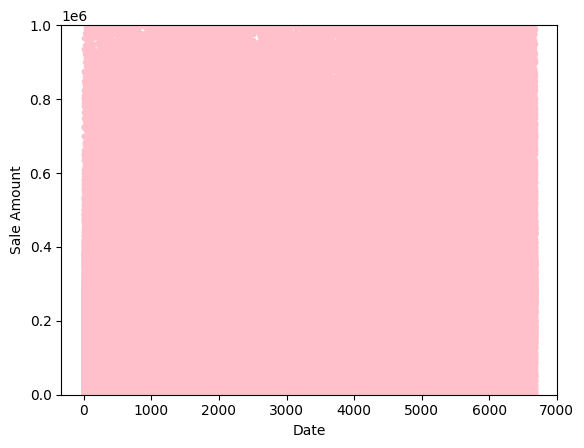

In [31]:
# Date & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.date_n,y,color='pink',marker='.')
plt.xlabel('Date')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

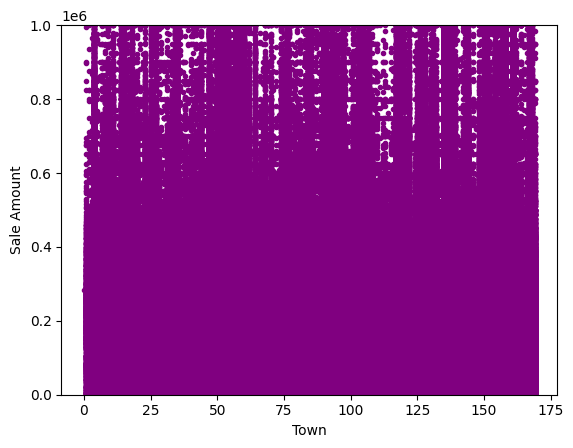

In [32]:
# Town & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.town_n,y,color='purple',marker='.')
plt.xlabel('Town')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

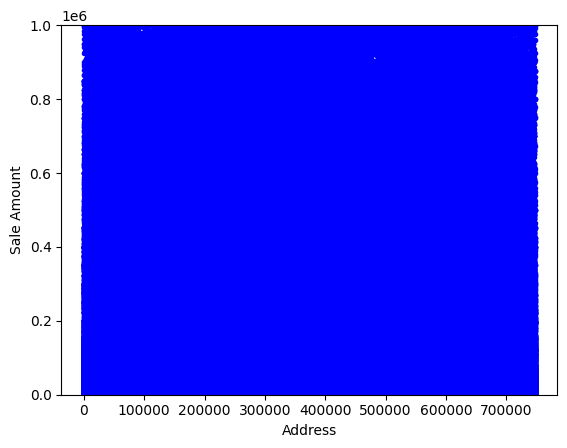

In [33]:
# Address & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.address_n,y,color='blue',marker='.')
plt.xlabel('Address')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

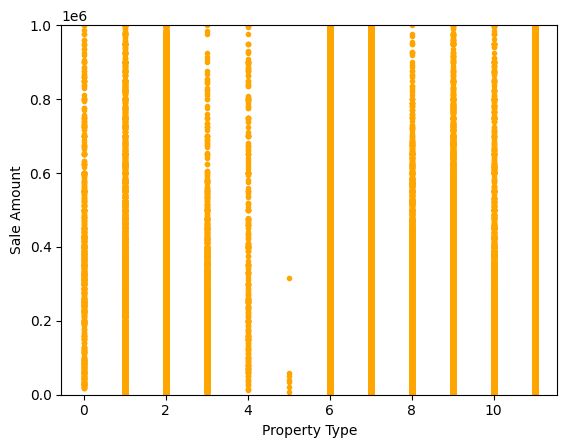

In [34]:
# Property Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.property_n,y,color='orange',marker='.')
plt.xlabel('Property Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

In [35]:
mapping = dict(zip(le_property.classes_, range(len(le_property.classes_))))
print(mapping)
# public utility is 5, seems to make value of property cheap

{'Apartments': 0, 'Commercial': 1, 'Condo': 2, 'Four Family': 3, 'Industrial': 4, 'Public Utility': 5, 'Residential': 6, 'Single Family': 7, 'Three Family': 8, 'Two Family': 9, 'Vacant Land': 10, nan: 11}


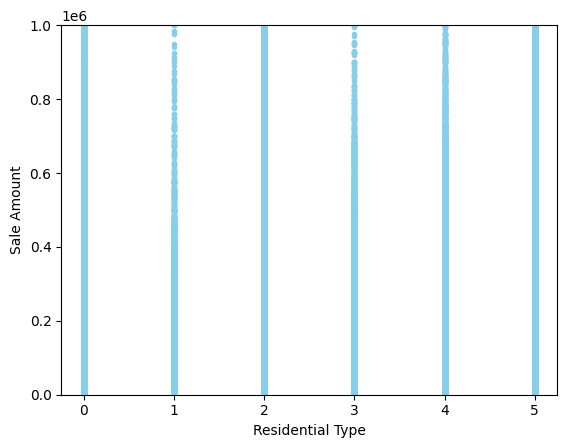

In [36]:
# Residential Type & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.residential_n,y,color='skyblue',marker='.')
plt.xlabel('Residential Type')
plt.ylabel('Sale Amount')
plt.ylim(0, 1000000)
plt.show()

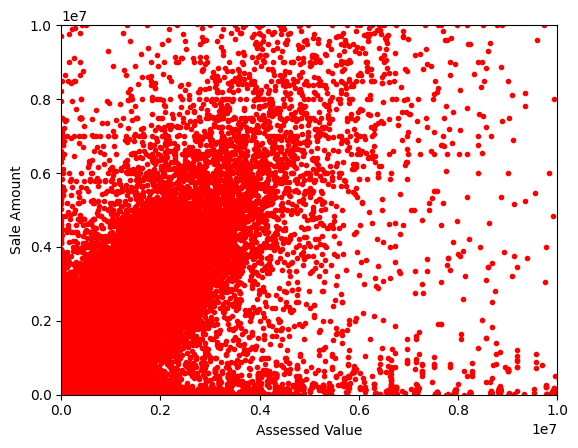

In [37]:
# Assessed Value & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Assessed Value'],y,color='red',marker='.')
plt.xlabel('Assessed Value')
plt.ylabel('Sale Amount')
plt.xlim(0, 10000000)
plt.ylim(0, 10000000)
plt.show()

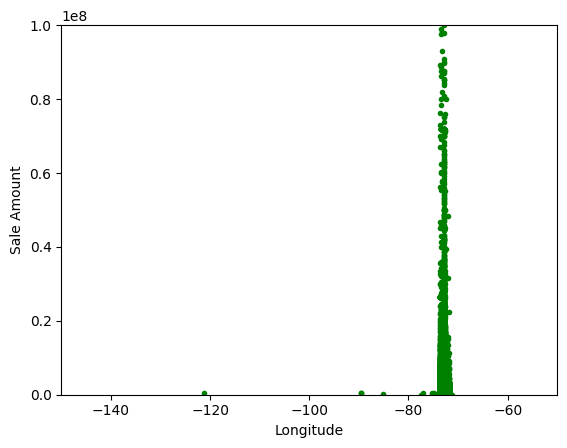

In [38]:
# Longitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Longitude'],y,color='green',marker='.')
plt.xlabel('Longitude')
plt.ylabel('Sale Amount')
plt.xlim(-150, -50)
plt.ylim(0, 100000000)
plt.show()

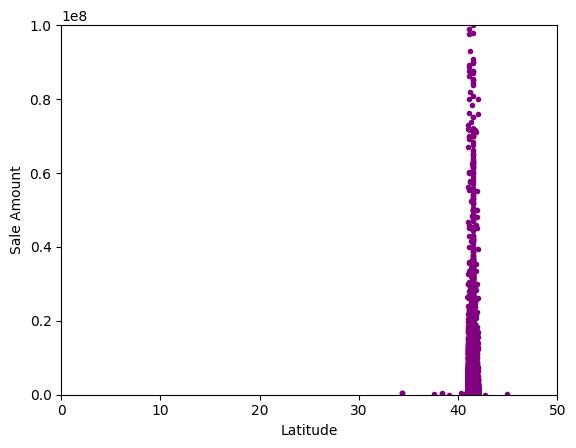

In [39]:
# Latitude & Sale Amount
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['Latitude'],y,color='purple',marker='.')
plt.xlabel('Latitude')
plt.ylabel('Sale Amount')
plt.xlim(0, 50)
plt.ylim(0, 100000000)
plt.show()

In [40]:
# MixMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['List Year'] = scaler.fit_transform(df[['List Year']])
df['Assessed Value'] = scaler.fit_transform(df[['Assessed Value']])
df['Longitude'] = scaler.fit_transform(df[['Longitude']])
df['Latitude'] = scaler.fit_transform(df[['Latitude']])
df['date_n'] = scaler.fit_transform(df[['date_n']])
df['town_n'] = scaler.fit_transform(df[['town_n']])
df['address_n'] = scaler.fit_transform(df[['address_n']])
df['property_n'] = scaler.fit_transform(df[['property_n']])
df['residential_n'] = scaler.fit_transform(df[['residential_n']])
print("Min:", df['List Year'].min())
print("Max:", df['Assessed Value'].max())
print("Min:", df['Longitude'].min())
print("Max:", df['Latitude'].max())
print("Min:", df['date_n'].min())
print("Max:", df['town_n'].max())
print("Max:", df['address_n'].max())
print("Max:", df['property_n'].max())
print("Max:", df['residential_n'].max())
print(df)

Min: 0.0
Max: 1.0
Min: 0.0
Max: 0.9999999999999996
Min: 0.0
Max: 1.0
Max: 1.0
Max: 1.0
Max: 1.0
        Date Recorded  List Year        Town                    Address  \
0          2021-04-14       0.95     Ansonia              323 BEAVER ST   
1          2021-05-26       0.95     Ansonia             152 JACKSON ST   
2          2021-09-13       0.95     Ansonia            230 WAKELEE AVE   
3          2020-12-14       0.95     Ansonia                57 PLATT ST   
4          2021-09-07       0.95        Avon               245 NEW ROAD   
...               ...        ...         ...                        ...   
1054154    2021-11-16       1.00   Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       1.00    Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       1.00    Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       1.00  West Haven             114 TUTHILL ST   
1054158    2022-04-26       1.00     Windsor         200 BLOOMFIELD AVE   

   

<ipython-input-40-e3464eb901e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['List Year'] = scaler.fit_transform(df[['List Year']])
<ipython-input-40-e3464eb901e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Assessed Value'] = scaler.fit_transform(df[['Assessed Value']])
<ipython-input-40-e3464eb901e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [41]:
mymodel=LinearRegression()
mymodel.fit(x,y)

LinearRegression()

In [42]:
mymodel.intercept_

97010116.97974667

In [43]:
# x=df[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
mymodel.coef_

array([-4.73765279e+04,  3.79310482e-01, -1.85205928e+05, -3.73095114e+05,
        1.94634834e+02,  5.48744697e+02, -3.29135724e-02, -9.06280369e+04,
        1.86629779e+05])

In [44]:
# pred_sales_amount = -4.73765279e+04('List Year') + 3.79310482e-01('Assessed Value') + -1.85205928e+05('Longitude') + -3.73095114e+05('Latitude')
# + 1.94634834e+02('date_n') + 5.48744697e+02('town_n') + -3.29135724e-02('address_n') + -9.06280369e+04('property_n') + 1.86629779e+05('residential_n')
# + 97010116.97974667

In [45]:
y_pred_lin=mymodel.predict(x_test)
print(y_pred_lin)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


Mean Absolute Error (MAE): 279319.25530593714
Mean Squared Error (MSE): 4982191624878.448
R-squared: 0.11645654754593882


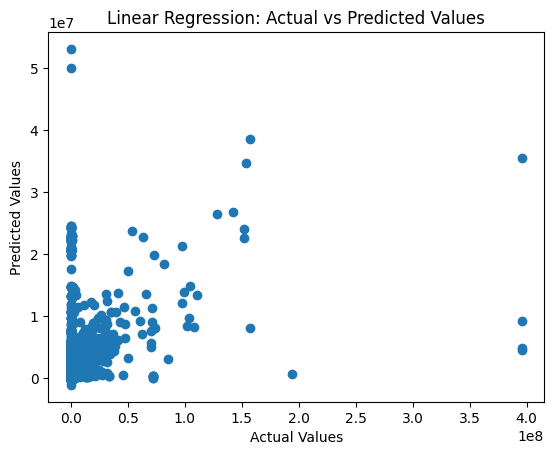

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lin)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lin)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_lin)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# plot
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.show()

In [47]:
from sklearn.linear_model import Ridge
mymodel_ridge=Ridge()
mymodel_ridge.fit(x,y)

Ridge()

In [48]:
y_pred_rid=mymodel.predict(x_test)
print(y_pred_rid)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


Mean Squared Error: 4982191624878.448
Mean Absolute Error (MAE): 279319.25530593714
R-squared: 0.11645654754593882


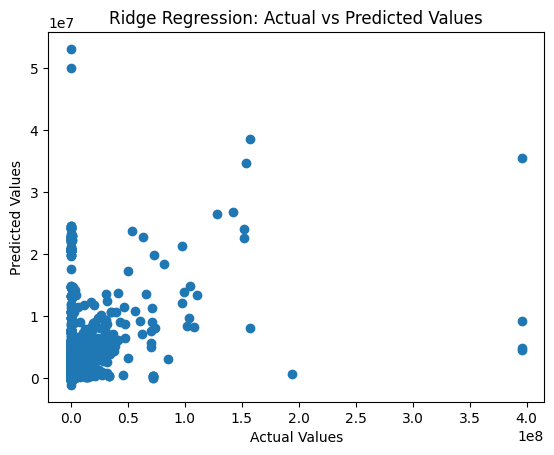

In [49]:
from sklearn.linear_model import Ridge

# make ridge regression model
ridge_regression = Ridge(alpha=1.0)

# Fit model to training data
ridge_regression.fit(x_train, y_train)

# predict test data
y_prediction = ridge_regression.predict(x_test)

# evaluate
mse = mean_squared_error(y_test, y_pred_rid)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rid)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_rid)
print("R-squared:", r_squared)

# plot actual vs prediction val
plt.scatter(y_test, y_pred_rid)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.show()

In [50]:
from sklearn.linear_model import Lasso
mymodel_lasso=Lasso()
mymodel_lasso.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+19, tolerance: 2.883e+15
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [51]:
y_pred_las=mymodel.predict(x_test)
print(y_pred_las)

[359419.40629245 505174.38814472 369169.98918733 ... 377494.20164773
 287972.51935191 330533.82370558]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.367e+19, tolerance: 2.765e+15
  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 4982191624878.448
Mean Absolute Error (MAE): 279319.25530593714
R-squared: 0.11645654754593882


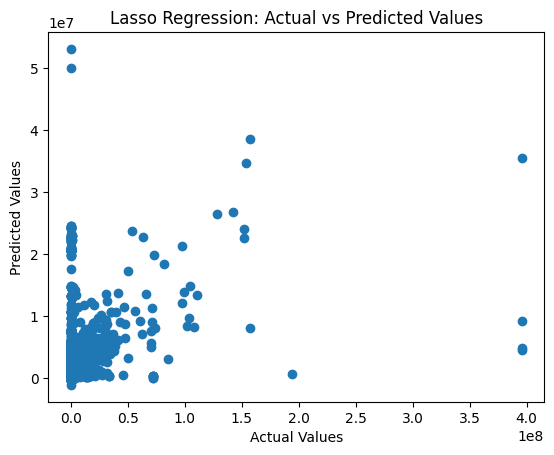

In [52]:
from sklearn.linear_model import Lasso

# make Lasso regression
lasso = Lasso(alpha=1.0)

# Fit model to training data
lasso.fit(x_train, y_train)

# Predict on test data
y_prediction = lasso.predict(x_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred_las)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_las)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred_las)
print("R-squared:", r_squared)

# Plot predictions vs actual val
plt.scatter(y_test, y_pred_las)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted Values")
plt.show()

In [53]:
df_log = df.copy(deep=True)
df_log['Affordable'] = df_log['Sale Amount'].apply(lambda x: 1 if x > 350000 else 0)
df_log

Date Recorded  List Year        Town                    Address  \
0          2021-04-14       0.95     Ansonia              323 BEAVER ST   
1          2021-05-26       0.95     Ansonia             152 JACKSON ST   
2          2021-09-13       0.95     Ansonia            230 WAKELEE AVE   
3          2020-12-14       0.95     Ansonia                57 PLATT ST   
4          2021-09-07       0.95        Avon               245 NEW ROAD   
...               ...        ...         ...                        ...   
1054154    2021-11-16       1.00   Watertown            50 SUMMIT RIDGE   
1054155    2022-09-20       1.00    Woodbury  89 TAMARACK LANR UNIT 89A   
1054156    2022-05-06       1.00    Woodbury         69 BACON POND ROAD   
1054157    2022-06-29       1.00  West Haven             114 TUTHILL ST   
1054158    2022-04-26       1.00     Windsor         200 BLOOMFIELD AVE   

         Assessed Value  Sale Amount  Sales Ratio Property Type  \
0              0.000151     248400.0       0.5354   Residential   
1              0.000125     239900.0       0.4606   Residential   
2              0.000171     325000.0       0.4630    Commercial   
3              0.000145     202500.0       0.6291   Residential   
4              0.000247     400000.0       0.5441   Residential   
...                 ...          ...          ...           ...   
1054154        0.000298     430000.0       0.6118   Residential   
1054155        0.000091     200000.0       0.3990   Residential   
1054156        0.000090     360000.0       0.2210   Vacant Land   
1054157        0.000133     275000.0       0.4276   Residential   
1054158        0.000148     190000.0       0.6878    Commercial   

        Residential Type  Longitude  Latitude    date_n    town_n  address_n  \
0          Single Family   0.962419  0.661486  0.936311  0.011834   0.516049   
1           Three Family   0.966212  0.675595  0.941705  0.011834   0.199834   
2                    NaN   0.966212  0.675595  0.955043  0.011834   0.374410   
3             Two Family   0.966212  0.675595  0.921325  0.011834   0.749935   
4          Single Family   0.966212  0.675595  0.954443  0.023669   0.395806   
...                  ...        ...       ...       ...       ...        ...   
1054154    Single Family   0.961488  0.683792  0.962536  0.905325   0.702888   
1054155            Condo   0.959132  0.677257  0.998352  0.994083   0.933844   
1054156              NaN   0.959960  0.679757  0.982017  0.994083   0.823827   
1054157    Single Family   0.964258  0.655012  0.988611  0.917160   0.080266   
1054158              NaN   0.970714  0.708919  0.980668  0.970414   0.319038   

         property_n  residential_n  Affordable  
0          0.545455            0.4           0  
1          0.545455            0.6           0  
2          0.090909            1.0           0  
3          0.545455            0.8           0  
4          0.545455            0.4           1  
...             ...            ...         ...  
1054154    0.545455            0.4           1  
1054155    0.545455            0.0           0  
1054156    0.909091            1.0           1  
1054157    0.545455            0.4           0  
1054158    0.090909            1.0           0  

[1045454 rows x 17 columns]

In [54]:
xlog=df_log[['List Year', 'Assessed Value', 'Longitude', 'Latitude', 'date_n', 'town_n','address_n', 'property_n', 'residential_n']]
ylog=df_log['Affordable']

xlog_train,xlog_test,ylog_train,ylog_test=train_test_split(xlog,ylog,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [56]:
mymodellog = LogisticRegression()

In [57]:
mymodellog.fit(xlog_train,ylog_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred_log = mymodellog.predict(xlog_test)

In [59]:
mymodellog.predict_proba(xlog_test)

array([[0.82669792, 0.17330208],
       [0.62401814, 0.37598186],
       [0.63663577, 0.36336423],
       ...,
       [0.65741721, 0.34258279],
       [0.78627308, 0.21372692],
       [0.71636816, 0.28363184]])

In [60]:
# Check accuracy of model
mymodellog.score(xlog_test,ylog_test)

0.7431453290672483

In [61]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
mymodellog.coef_

array([[ -5.46421016,  46.77082437, -40.11941072, -21.66186813,
          6.67145763,   0.2347373 ,  -0.14475663,   0.21430059,
          0.30976647]])

In [63]:
mymodellog.intercept_

array([51.24875266])

In [64]:
# Model Evaluation - From Lecture
y_pred_log = mymodellog.predict(xlog_test)
accuracy = accuracy_score(ylog_test, y_pred_log)
precision = precision_score(ylog_test, y_pred_log)
recall = recall_score(ylog_test, y_pred_log)
f1 = f1_score(ylog_test, y_pred_log)
roc_auc = roc_auc_score(ylog_test, y_pred_log)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.7431453290672483
Precision: 0.7379466817923993
Recall: 0.09119904665101118
F1 Score: 0.16233583928627135
ROC AUC: 0.5395217355350181


In [65]:
# The dataset is too large to do SVC and the computation time was too long and never ran
# Same with KNN. It is too computationally expensive and utilizes too much memory. It also did not run.

In [66]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

mymodel_decisiontree= DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [67]:
mymodel_decisiontree.fit(xlog_train,ylog_train)
y_pred=mymodel_decisiontree.predict(xlog_test)

In [68]:
from sklearn.metrics import accuracy_score
FinalAccuracy = accuracy_score(ylog_test, y_pred)
print(f'Accuracy: {FinalAccuracy}')

Accuracy: 0.7967966100884304


[Text(0.5, 0.875, 'x[1] <= 0.001\ngini = 0.396\nsamples = 836363\nvalue = [609313, 227050]'),
 Text(0.25, 0.625, 'x[2] <= 0.959\ngini = 0.36\nsamples = 790966\nvalue = [604410, 186556]'),
 Text(0.125, 0.375, 'x[1] <= 0.0\ngini = 0.477\nsamples = 35145\nvalue = [13808, 21337]'),
 Text(0.0625, 0.125, 'gini = 0.335\nsamples = 13455\nvalue = [10594, 2861]'),
 Text(0.1875, 0.125, 'gini = 0.252\nsamples = 21690\nvalue = [3214, 18476]'),
 Text(0.375, 0.375, 'x[1] <= 0.001\ngini = 0.342\nsamples = 755821\nvalue = [590602, 165219]'),
 Text(0.3125, 0.125, 'gini = 0.333\nsamples = 748474\nvalue = [590196, 158278]'),
 Text(0.4375, 0.125, 'gini = 0.104\nsamples = 7347\nvalue = [406, 6941]'),
 Text(0.75, 0.625, 'x[8] <= 0.9\ngini = 0.193\nsamples = 45397\nvalue = [4903, 40494]'),
 Text(0.625, 0.375, 'x[5] <= 0.092\ngini = 0.043\nsamples = 28177\nvalue = [618, 27559]'),
 Text(0.5625, 0.125, 'gini = 0.335\nsamples = 624\nvalue = [133, 491]'),
 Text(0.6875, 0.125, 'gini = 0.035\nsamples = 27553\nvalue 

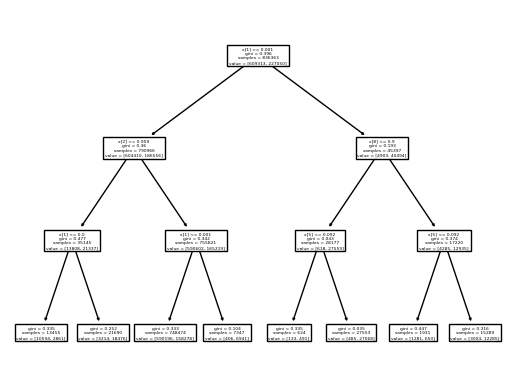

In [69]:
plot_tree(mymodel_decisiontree)

In [70]:
accuracy = accuracy_score(ylog_test, y_pred)
precision = precision_score(ylog_test, y_pred)
recall = recall_score(ylog_test, y_pred)
f1 = f1_score(ylog_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7967966100884304
Precision: 0.8968954248366013
Recall: 0.28858084189127614
F1 Score: 0.436663042613561


In [71]:
from sklearn.model_selection import cross_val_score

# cross validation
cv_scores = cross_val_score(mymodel_decisiontree, x, df_log.Affordable, cv=6)

# show cv scores
print("Cross-Validation Scores:", cv_scores)

# show mean cv score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.9048111  0.85798569 0.87226386 0.90487368 0.90667577 0.87453656]
Mean Cross-Validation Score: 0.8868577775002738


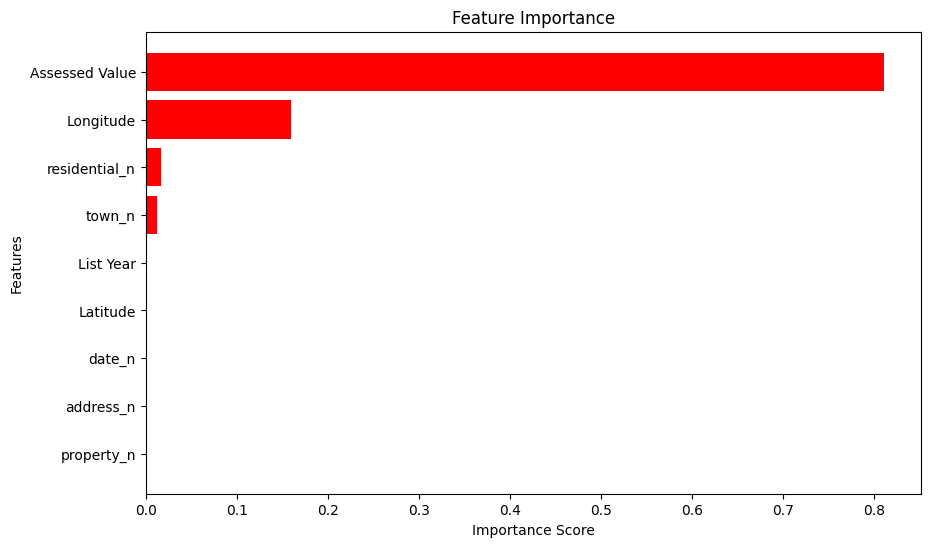

          Feature  Importance
1  Assessed Value    0.810824
2       Longitude    0.159388
8   residential_n    0.017302
5          town_n    0.012485
0       List Year    0.000000
3        Latitude    0.000000
4          date_n    0.000000
6       address_n    0.000000
7      property_n    0.000000


In [72]:
feature_importances = mymodel_decisiontree.feature_importances_

# create importance df
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# sort by most important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='red')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

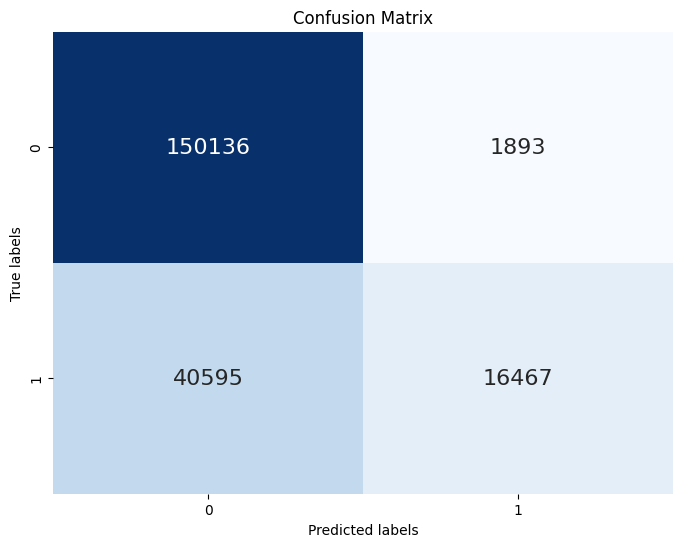

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88    152029
           1       0.90      0.29      0.44     57062

    accuracy                           0.80    209091
   macro avg       0.84      0.64      0.66    209091
weighted avg       0.82      0.80      0.76    209091



In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# make confusion matrix
conf_matrix = confusion_matrix(ylog_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
report = classification_report(ylog_test, y_pred)

print('Classification Report:')
print(report)

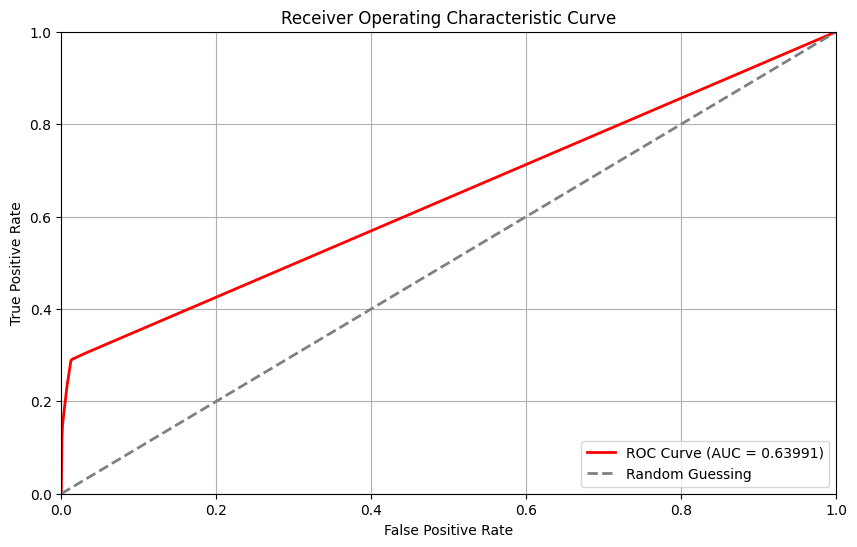

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

# probabilities for positive class
y_prob = mymodel_decisiontree.predict_proba(xlog_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(ylog_test, y_prob)

# AUC score
auc = roc_auc_score(ylog_test, y_prob)

# Plot ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [112]:
# Grid Search Cross Validation for Decision Tree
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
# mixture of different hyperparameters
parameter_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4],
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=parameter_grid, cv=4, n_jobs=-1)
grid_search.fit(xlog_train, ylog_train)

# find best parameters and estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best parameters found: {best_params}')

# predict using best model
y_pred_grid_search = best_model.predict(xlog_test)

final_accuracy = accuracy_score(ylog_test, y_pred_grid_search)
print(f'Accuracy: {final_accuracy}')

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy: 0.8126318205948606


In [113]:
mymodelbest_decisiontree= DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=3, min_samples_leaf=2 , random_state=42)

In [114]:
mymodelbest_decisiontree.fit(xlog_train,ylog_train)
y_pred_bdt=mymodelbest_decisiontree.predict(xlog_test)

In [115]:
from sklearn.metrics import accuracy_score
FinalAccuracy = accuracy_score(ylog_test, y_pred_bdt)
print(f'Accuracy: {FinalAccuracy}')

Accuracy: 0.8126318205948606


[Text(0.5, 0.9166666666666666, 'x[1] <= 0.001\ngini = 0.396\nsamples = 836363\nvalue = [609313, 227050]'),
 Text(0.25, 0.75, 'x[2] <= 0.959\ngini = 0.36\nsamples = 790966\nvalue = [604410, 186556]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 0.0\ngini = 0.477\nsamples = 35145\nvalue = [13808, 21337]'),
 Text(0.0625, 0.4166666666666667, 'x[1] <= 0.0\ngini = 0.335\nsamples = 13455\nvalue = [10594, 2861]'),
 Text(0.03125, 0.25, 'x[2] <= 0.953\ngini = 0.243\nsamples = 9937\nvalue = [8530, 1407]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.419\nsamples = 1723\nvalue = [1209, 514]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.194\nsamples = 8214\nvalue = [7321, 893]'),
 Text(0.09375, 0.25, 'x[4] <= 0.31\ngini = 0.485\nsamples = 3518\nvalue = [2064, 1454]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.44\nsamples = 1169\nvalue = [382, 787]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.407\nsamples = 2349\nvalue = [1682, 667]'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 0.0\ng

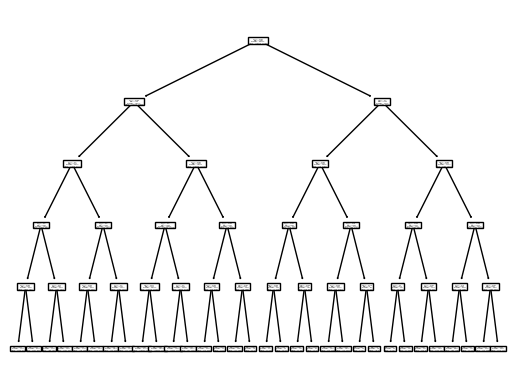

In [116]:
plot_tree(mymodelbest_decisiontree)

In [117]:
accuracy = accuracy_score(ylog_test, y_pred_bdt)
precision = precision_score(ylog_test, y_pred_bdt)
recall = recall_score(ylog_test, y_pred_bdt)
f1 = f1_score(ylog_test, y_pred_bdt)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8126318205948606
Precision: 0.9012428770135056
Recall: 0.3520030843643756
F1 Score: 0.5062697702554537


In [118]:
from sklearn.model_selection import cross_val_score

# cross validation
cv_scores = cross_val_score(mymodelbest_decisiontree, x, df_log.Affordable, cv=6)

# show cv scores
print("Cross-Validation Scores:", cv_scores)

# show mean cv score
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.9053391  0.86537766 0.87972475 0.90600429 0.89690775 0.88001171]
Mean Cross-Validation Score: 0.888894209665525


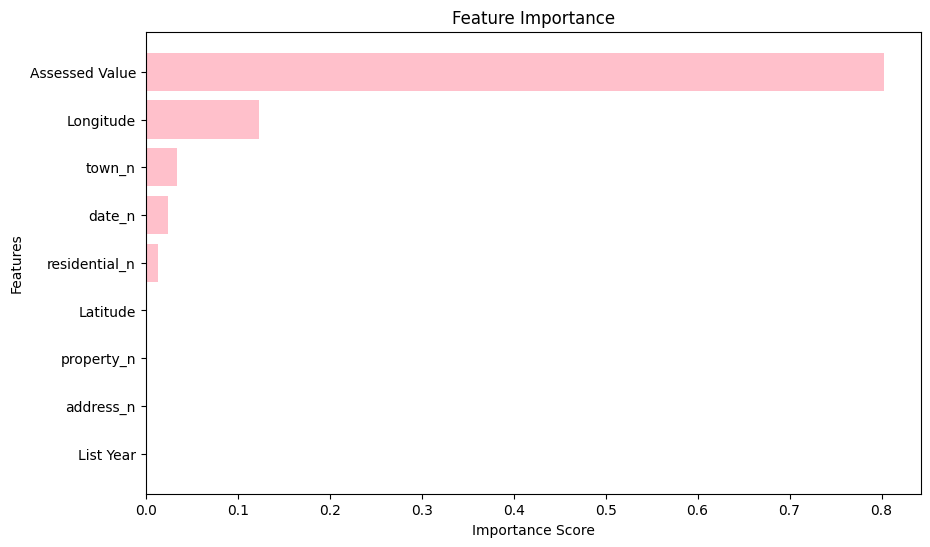

          Feature  Importance
1  Assessed Value    0.802417
2       Longitude    0.122982
5          town_n    0.034555
4          date_n    0.024806
8   residential_n    0.013217
3        Latitude    0.001478
7      property_n    0.000521
6       address_n    0.000024
0       List Year    0.000000


In [120]:
feature_importances = mymodelbest_decisiontree.feature_importances_

# create importance df
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# sort by most important
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='pink')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df)

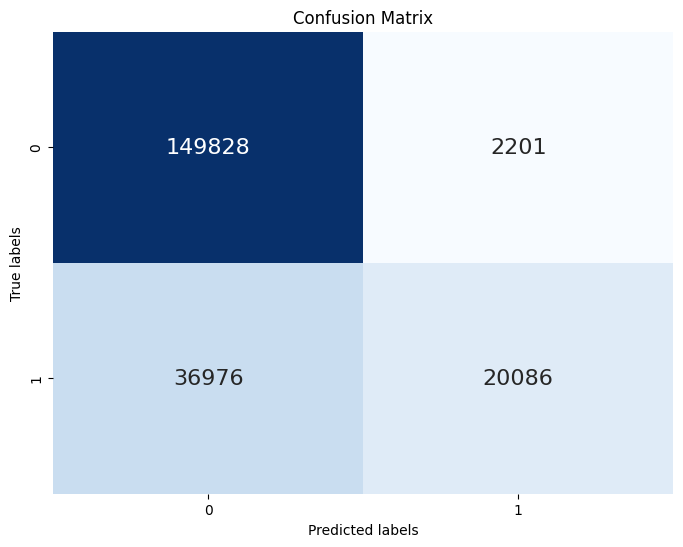

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88    152029
           1       0.90      0.35      0.51     57062

    accuracy                           0.81    209091
   macro avg       0.85      0.67      0.70    209091
weighted avg       0.83      0.81      0.78    209091



In [121]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# make confusion matrix
conf_matrix = confusion_matrix(ylog_test, y_pred_bdt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
report = classification_report(ylog_test, y_pred_bdt)

print('Classification Report:')
print(report)

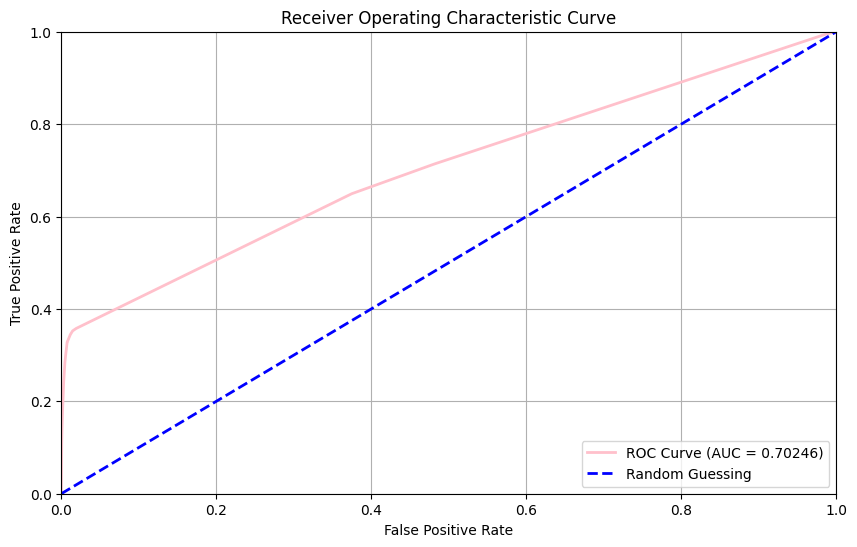

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

# probabilities for positive class
y_prob_bdt = mymodelbest_decisiontree.predict_proba(xlog_test)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(ylog_test, y_prob_bdt)

# AUC score
auc = roc_auc_score(ylog_test, y_prob_bdt)

# Plot ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='pink', lw=2, label=f'ROC Curve (AUC = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [78]:
# Random forest classifier, with the amount of data, is computationally expensive.

In [82]:
# Simple Neural Network for Regression
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

mymodel_snn = keras.Sequential([
    keras.layers.Dense(1, input_shape=(9,), activation='linear', kernel_initializer='ones', bias_initializer='zeros')
])

mymodel_snn.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

mymodel_snn.fit(x_train, y_train, epochs=5)

Epoch 1/5
26137/26137 [==============================] - 47s 2ms/step - loss: 33404062007296.0000 - mean_squared_error: 33404062007296.0000
Epoch 2/5
26137/26137 [==============================] - 54s 2ms/step - loss: 32786807259136.0000 - mean_squared_error: 32786807259136.0000
Epoch 3/5
26137/26137 [==============================] - 44s 2ms/step - loss: 32769619001344.0000 - mean_squared_error: 32769619001344.0000
Epoch 4/5
26137/26137 [==============================] - 44s 2ms/step - loss: 32749360513024.0000 - mean_squared_error: 32749360513024.0000
Epoch 5/5
26137/26137 [==============================] - 43s 2ms/step - loss: 32834915926016.0000 - mean_squared_error: 32834915926016.0000


In [85]:
mymodel_snn.evaluate(x_test,y_test)
mymodel_snn.predict(x_test)

6535/6535 [==============================] - 10s 1ms/step


array([[434149.34],
       [299539.2 ],
       [237939.22],
       ...,
       [192012.62],
       [171645.98],
       [295503.97]], dtype=float32)

In [86]:
y_test

531040    385000.0
928510    285000.0
812288    175000.0
849367    178000.0
770807    190100.0
            ...   
590251    393000.0
266386    185000.0
907320    120000.0
82620     239900.0
892256    200000.0
Name: Sale Amount, Length: 209091, dtype: float64

In [88]:
# Evaluate the model
loss, mse = mymodel_snn.evaluate(x_test, y_test)
print(f'Test Mean Squared Error: {mse:.4f}')

# Make predictions
y_pred = mymodel_snn.predict(x_test)

6535/6535 [==============================] - 17s 3ms/step - loss: 4918952853504.0000 - mean_squared_error: 4918952853504.0000
Test Mean Squared Error: 4918952853504.0000
6535/6535 [==============================] - 8s 1ms/step


In [89]:
# mse
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# mae
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# r squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 4918948691121.438
Mean Absolute Error (MAE): 243197.1895702499
R-squared: 0.1276720695977135


In [93]:
# Simple Neural Network for Classification
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

%matplotlib inline

mymodel_snnc = Sequential([
    Dense(1, input_shape=(9,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

# Compile the model
mymodel_snnc.compile(optimizer=Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])

# Train the model
mymodel_snnc.fit(xlog_train, ylog_train, epochs=5)

# Evaluate the model
loss, accuracy = mymodel_snnc.evaluate(xlog_test, ylog_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
y_pred_snnc = (mymodel_snnc.predict(xlog_test) > 0.5).astype("int32")

Epoch 1/5
26137/26137 [==============================] - 61s 2ms/step - loss: 0.6276 - accuracy: 0.7114
Epoch 2/5
26137/26137 [==============================] - 46s 2ms/step - loss: 0.5778 - accuracy: 0.7287
Epoch 3/5
26137/26137 [==============================] - 48s 2ms/step - loss: 0.5765 - accuracy: 0.7288
Epoch 4/5
26137/26137 [==============================] - 46s 2ms/step - loss: 0.5754 - accuracy: 0.7288
Epoch 5/5
6535/6535 [==============================] - 10s 1ms/step - loss: 0.5748 - accuracy: 0.7273
Test Accuracy: 0.7273
6535/6535 [==============================] - 9s 1ms/step


In [94]:
mymodel_snnc.evaluate(xlog_test,ylog_test)
mymodel_snnc.predict(xlog_test)

6535/6535 [==============================] - 9s 1ms/step


array([[0.19664843],
       [0.36121076],
       [0.30434108],
       ...,
       [0.3514047 ],
       [0.22251445],
       [0.3237654 ]], dtype=float32)

In [95]:
ylog_test

531040    1
928510    0
812288    0
849367    0
770807    0
         ..
590251    1
266386    0
907320    0
82620     0
892256    0
Name: Affordable, Length: 209091, dtype: int64

In [96]:
accuracy = accuracy_score(ylog_test, y_pred_snnc)
precision = precision_score(ylog_test, y_pred_snnc)
recall = recall_score(ylog_test, y_pred_snnc)
f1 = f1_score(ylog_test, y_pred_snnc)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7273053359542018
Precision: 0.5658682634730539
Recall: 0.003312186744243104
F1 Score: 0.0065858247961530425


In [98]:
# Gaussian Naive Bayes
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.naive_bayes import GaussianNB
mymodel_gnb=GaussianNB()

In [99]:
mymodel_gnb.fit(xlog_train,ylog_train)

GaussianNB()

In [100]:
mymodel_gnb.score(xlog_test,ylog_test)

0.7325422901990043

In [101]:
mymodel_gnb.predict_proba(xlog_test[:10])

array([[0.96713809, 0.03286191],
       [0.88768157, 0.11231843],
       [0.76944431, 0.23055569],
       [0.90134419, 0.09865581],
       [0.91221138, 0.08778862],
       [0.90950132, 0.09049868],
       [0.96008716, 0.03991284],
       [0.86275174, 0.13724826],
       [0.97105102, 0.02894898],
       [0.88909112, 0.11090888]])

In [102]:
from sklearn.model_selection import cross_val_score
cross_val_score(mymodel_gnb,xlog_train,ylog_train,cv=4)

array([0.73889837, 0.73154751, 0.7300362 , 0.7321297 ])

In [104]:
# Make predictions
y_pred_gnb = mymodel_gnb.predict(xlog_test)

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Calculate evaluation metrics
accuracy = accuracy_score(ylog_test, y_pred_gnb)
precision = precision_score(ylog_test, y_pred_gnb, average='weighted')
recall = recall_score(ylog_test, y_pred_gnb, average='weighted')
f1 = f1_score(ylog_test, y_pred_gnb, average='weighted')

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print classification report
print('Classification Report:')
print(classification_report(ylog_test, y_pred_gnb))

Accuracy: 0.7325
Precision: 0.6912
Recall: 0.7325
F1 Score: 0.6770
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84    152029
           1       0.53      0.16      0.25     57062

    accuracy                           0.73    209091
   macro avg       0.64      0.55      0.54    209091
weighted avg       0.69      0.73      0.68    209091



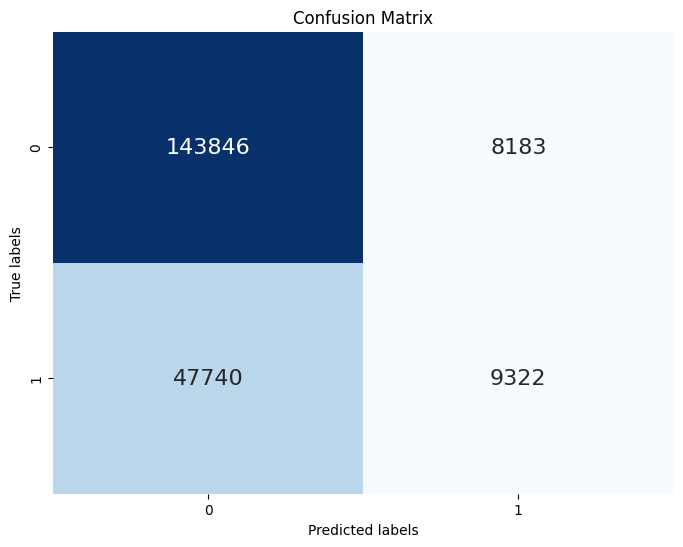

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84    152029
           1       0.53      0.16      0.25     57062

    accuracy                           0.73    209091
   macro avg       0.64      0.55      0.54    209091
weighted avg       0.69      0.73      0.68    209091



In [111]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# make confusion matrix
conf_matrix = confusion_matrix(ylog_test, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 16}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# classification report
report = classification_report(ylog_test, y_pred_gnb)

print('Classification Report:')
print(report)